In [1]:
import numpy as np
import pandas as pd
sales=pd.read_csv('kc_house_data.csv')

In [2]:
def get_numpy_data(data_frame, features, output):
    data_frame['constant']=1
    features=['constant']+features
    feature_matrix=data_frame[features].values
    output_array=data_frame[output].values
    return (feature_matrix, output_array)

def predict(feature_matrix,weights):
    prediction=np.dot(feature_matrix,weights)
    return prediction

In [6]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant==False:
        derivative=2*np.dot(feature,errors)+2*l2_penalty*weight
    else:
        derivative=2*np.dot(feature,errors)
    return derivative

In [7]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print (np.sum(errors*example_features[:,1])*2+20.)


# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print (np.sum(errors)*2.)

-56554166815950.0
-56554166815950.0
-22446749330.0
-22446749330.0


In [8]:
my_weights

array([ 1., 10.])

In [10]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
        #while not reached maximum number of iterations:
        # compute the predictions using your predict_output() function
        
    for iter in range(max_iterations):
        predictions=predict(feature_matrix,weights)
        errors=predictions-output
       # compute the errors as predictions - output
     
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            
            if i==0:
                de=feature_derivative_ridge(errors,feature_matrix[:,0],weights[0],l2_penalty,True)
                weights[0]-=de*step_size
            else:
                de=feature_derivative_ridge(errors,feature_matrix[:,i],weights[i],l2_penalty,False)
                weights[i]-=de*step_size
            # subtract the step size times the derivative from the current weight  
    return weights

In [11]:
train=pd.read_csv('kc_house_train_data.csv')
test=pd.read_csv('kc_house_test_data.csv')

In [12]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test, simple_features, my_output)


In [47]:
initial_weights=np.array([0.0,0.0])
weights_0_penalty=ridge_regression_gradient_descent(simple_feature_matrix,output,initial_weights,1e-12,0.0,max_iterations=1000)

In [48]:
weights_0_penalty

array([-1.63113515e-01,  2.63024369e+02])

In [49]:
weights_high_penalty=ridge_regression_gradient_descent(simple_feature_matrix,output,initial_weights,1e-12,1e11,max_iterations=1000)

In [50]:
weights_high_penalty

array([  9.76730382, 124.57217567])

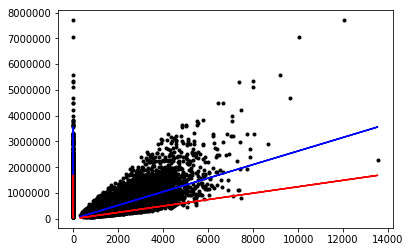

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict(simple_feature_matrix, weights_0_penalty),'b-',
        simple_feature_matrix,predict(simple_feature_matrix, weights_high_penalty),'r-')

In [52]:
rss_init=(((predict(simple_test_feature_matrix,initial_weights))-test_output)**2).sum()
rss_no=(((predict(simple_test_feature_matrix,weights_0_penalty))-test_output)**2).sum()
rss_high=(((predict(simple_test_feature_matrix,weights_high_penalty))-test_output)**2).sum()

In [53]:
print('',rss_init,'\n',rss_no,'\n',rss_high)

 1784273286136298.0 
 275723632153607.44 
 694642101489902.5


In [34]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test, model_features, my_output)

In [54]:
multi_weights_0_p=ridge_regression_gradient_descent(feature_matrix,output,[0.0,0.0,0.0],1e-12,0,max_iterations=1000)

In [55]:
multi_weights_high_p=ridge_regression_gradient_descent(feature_matrix,output,[0.0,0.0,0.0],1e-12,1e11,max_iterations=1000)

In [56]:
print(multi_weights_0_p,multi_weights_high_p)

[ -0.35743483 243.05416982  22.41481497] [ 6.74296579 91.48927365 78.43658766]


In [61]:
mrss_init=(((predict(test_feature_matrix,np.array([0.0,0.0,0.0])))-test_output)**2).sum()
mrss_no=(((predict(test_feature_matrix,multi_weights_0_p))-test_output)**2).sum()
mrss_high=(((predict(test_feature_matrix,multi_weights_high_p))-test_output)**2).sum()

In [62]:
print('',mrss_init,'\n',mrss_no,'\n',mrss_high)

 1784273286136298.0 
 274067615918575.56 
 500404800500841.75


In [59]:
predict(test_feature_matrix[0,:],multi_weights_0_p)-test_output[0]

77465.47605823533

In [60]:
predict(test_feature_matrix[0,:],multi_weights_high_p)-test_output[0]

-39546.46967805945